<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 19 **
** ┗ Customer purchase journey analysis **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Purchase Data EDA」
* 🥈SESSION 2 -「Purchase Journey Analysis」
* 🥇SESSION 3 -「Insight derivation」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/19_Customer Purchase Journey Analysis')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/19_Customer Purchase Journey Analysis'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🎫 (UX/UI designer, service planner, service operator)

``
Company A, which operates an internet shopping mall, is worried about the number of page clicks, departure and exit rates of customers in recent years.To solve this, the customer
Find a page to leave and try to improve UX/UI.

``


> ** Looking at the data **

* User log data
* Data specification ⬇

| Administrative | Administrative_duration | Information | INFORMTRELATED | Productrelated_duration |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Management page ID | Management page stay time | Information page ID | Information page stay time | Product page ID | Product page stay time |
| Bounces | Exitrates | PageValues ​​| Specialday | Month | OperatingsSystems |
| Departure Rate | End rate | Page clicks | Memorial date | Month | Operating System |
| Browser | Region | Traffictype | Visitortype | Weekend | Revenue |
| Browser | Region | Traffic Type | Visit Type | Weekend | Intervene |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter19_customer_journey.csv')
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ MAU (Monthly Active User) decreases, increasing departure customer
``

> ** Expected effect **

``
▶ MAU (Monthly Active User) increase, reduction of departure customer
``

> ** Solution **

``
▶ Departure/End Page Search and UX/UI Improvement
▶ Session 1 🥉
-Data pretreatment and page related data EDA
▶ Session 2 🥈
-User journey with high bouncing rate and exit rate (exit rate)
▶ Session 3 🥇
-Naving a single page and user journey improvement point that require improvement
``

> ** Performance measurement **

``
▶ UX/UI improvement, departure rate/exit rate, page view indicator monitoring
``

> ** Public application **

``
▶ Data analysis results write in -sight Report and management
▶ Insight Report -based UX/UI Improvement
``

> ** Main code preview **

``
▶ Session 1 → Groupby (', as_index = false) .mean ()
▶ Session 2 → Groupby () [']. COUNT (). Sort_values ​​(Ascending = FALSE)
▶ Session 3 → Groupby () [']. COUNT (). Sort_values ​​(Ascending = FALSE)
``


## ** 🥉Session 1 **
** ┗ Purchase data eda **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ 12,330 ROW, 18 cola
print('df', df.shape)

df (12330, 18)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
# ▶ Outlier verification
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### · page related data EDA
---
* Bouncerates: The ratio of departure without any action on that page
* Exitrates: The ratio of the page to be the last page for searching


In [ ]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# ▶ Number of users by month
pd.DataFrame(df['Month'].value_counts())

,count
Month,
May,3364
Nov,2998
Mar,1907
Dec,1727
Oct,549
Sep,448
Aug,433
Jul,432
June,288


In [ ]:
# ▶ Monthly user user use, alignment
pd.DataFrame(df['Month'].value_counts(), index=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

,count
Feb,184
Mar,1907
May,3364
June,288
Jul,432
Aug,433
Sep,448
Oct,549
Nov,2998
Dec,1727


In [ ]:
# ▶ Page perspective data filter
df_cus = df[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues']]
df_cus.head(5)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,1,0.20,0.20,0.0
1,0,0,2,0.00,0.10,0.0
2,0,0,1,0.20,0.20,0.0
3,0,0,2,0.05,0.14,0.0
4,0,0,10,0.02,0.05,0.0


In [ ]:
# ▶ 3,131 user journey
df_cus = df_cus.groupby(['Administrative', 'Informational', 'ProductRelated'], as_index=False).mean()
df_cus

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
2,0,0,2,0.059117,0.119900,0.219656
3,0,0,3,0.043066,0.092056,0.843937
4,0,0,4,0.035120,0.076977,0.747517
...,...,...,...,...,...,...
3126,24,5,34,0.000000,0.013801,0.000000
3127,24,6,178,0.003939,0.015263,6.149344
3128,24,6,189,0.018642,0.043831,0.870148
3129,26,9,183,0.011055,0.014200,19.567464


In [ ]:
df_cus.sort_values(by=['PageValues'], ascending = False).head(10)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
463,1,0,114,0.000000,0.000590,255.569158
1306,4,0,62,0.000000,0.001042,246.758590
2384,8,3,52,0.000000,0.005172,214.306663
3121,22,3,205,0.001747,0.008801,177.528825
2943,13,1,59,0.000000,0.004545,167.230834
263,0,2,66,0.000000,0.006154,143.211538
546,1,1,104,0.003883,0.010097,141.459054
1677,5,1,184,0.000000,0.003819,138.320834
2418,8,6,99,0.001869,0.006805,129.101374
1511,4,6,111,0.005420,0.006678,119.641474


## ** 🥈Session 2 **
** ┗ Purchase journey analysis **
---


### · User journey with the lowest page view
---


In [ ]:
# ▶ User journey with the lowest page click
df_cus.sort_values(by=['PageValues'], ascending=True)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
2094,7,1,4,0.000000,0.011111,0.000000
2079,7,0,85,0.013768,0.033907,0.000000
2080,7,0,96,0.012795,0.026301,0.000000
2085,7,0,117,0.002500,0.014375,0.000000
2086,7,0,118,0.001653,0.010021,0.000000
...,...,...,...,...,...,...
2943,13,1,59,0.000000,0.004545,167.230834
3121,22,3,205,0.001747,0.008801,177.528825
2384,8,3,52,0.000000,0.005172,214.306663
1306,4,0,62,0.000000,0.001042,246.758590


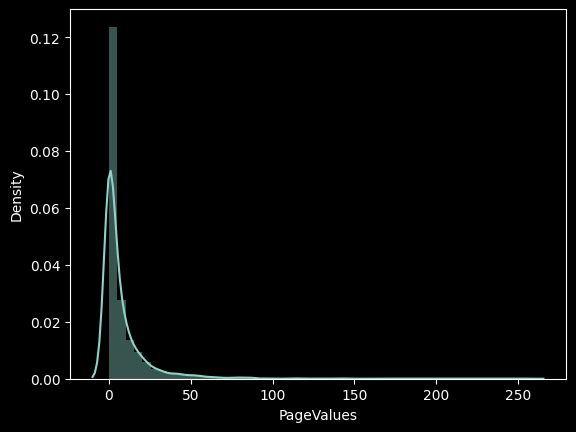

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df_cus['PageValues']);

### · User journey with the highest breeding rate
---


In [ ]:
# ▶ User journey with the highest beach rate
df_cus.sort_values(by=['BounceRates'], ascending=False)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
133,0,1,0,0.200000,0.200000,0.000000
479,1,1,0,0.200000,0.200000,0.000000
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
135,0,1,2,0.100000,0.133333,0.000000
...,...,...,...,...,...,...
2634,10,0,41,0.000000,0.007801,71.465979
2630,10,0,35,0.000000,0.010453,39.755772
2628,10,0,29,0.000000,0.010786,14.863139
2625,10,0,26,0.000000,0.002903,0.000000


In [ ]:
# Average of 0.7% bounce rate
df_cus['BounceRates'].mean()

np.float64(0.0074609932708118686)

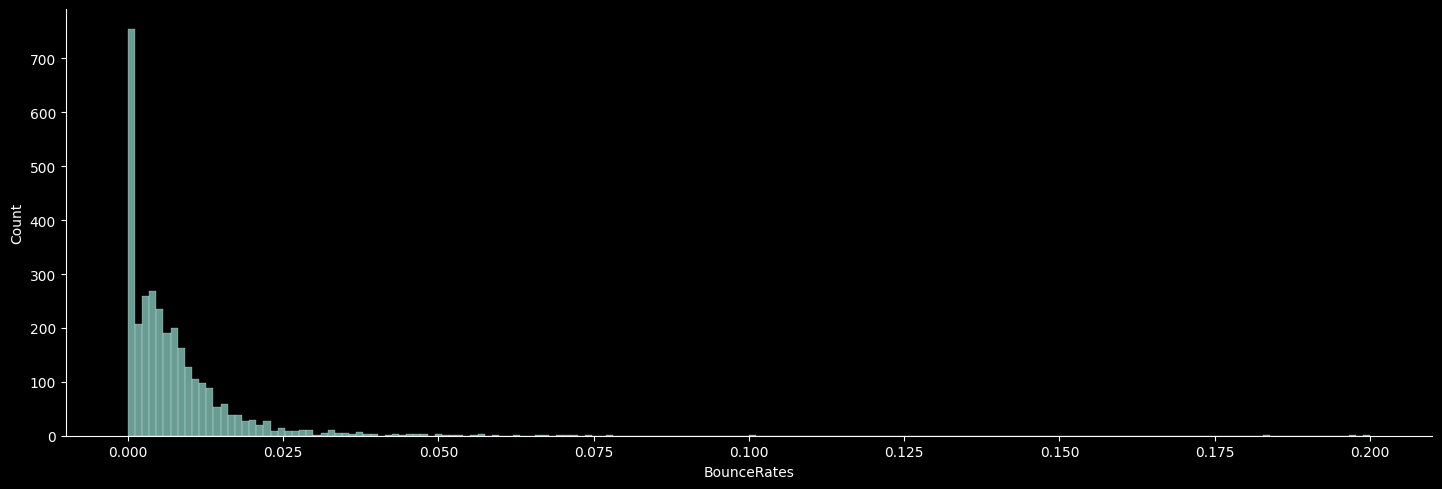

In [ ]:
# ▶ Displacement Rate Displotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.displot(df_cus, x="BounceRates");
plt.gcf().set_size_inches(16.5, 5)

In [ ]:
# ▶ User journey with a high beach rate based on the 75% quartile
df_cus['BounceRates'].describe()

,BounceRates
count,3131.000000
mean,0.007461
std,0.011096
min,0.000000
25%,0.001362
50%,0.005000
75%,0.009804
max,0.200000


In [ ]:
# ▶ User journey with a high beach rate based on the 75% quartile
df_cus[df_cus['BounceRates']>0.009804].head(5)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
2,0,0,2,0.059117,0.119900,0.219656
3,0,0,3,0.043066,0.092056,0.843937
4,0,0,4,0.035120,0.076977,0.747517


In [ ]:
len(df_cus[df_cus['BounceRates']>0.009804])

781

In [ ]:
# ▶ Administrative (management page)
df_admin = pd.DataFrame(df_cus[df_cus['BounceRates']>0.009804].groupby('Administrative')['Administrative'].count().sort_values(ascending=False))
df_admin.head(10)

,Administrative
Administrative,
0,140
1,86
2,81
3,68
5,63
4,54
6,52
9,45
8,42


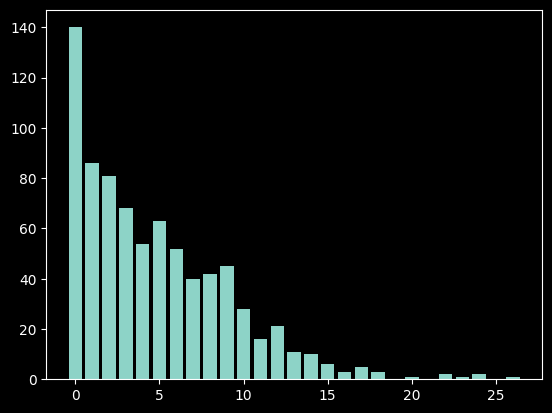

In [ ]:
# ▶ Administrative (Administrative Page) Plotting
plt.bar(df_admin.index, df_admin['Administrative']);

In [ ]:
# ▶ Information page
df_info = pd.DataFrame(df_cus[df_cus['BounceRates']>0.009804].groupby('Informational')['Informational'].count().sort_values(ascending=False))
df_info

,Informational
Informational,
0,248
1,173
2,138
3,92
4,63
5,28
6,21
7,12
9,4


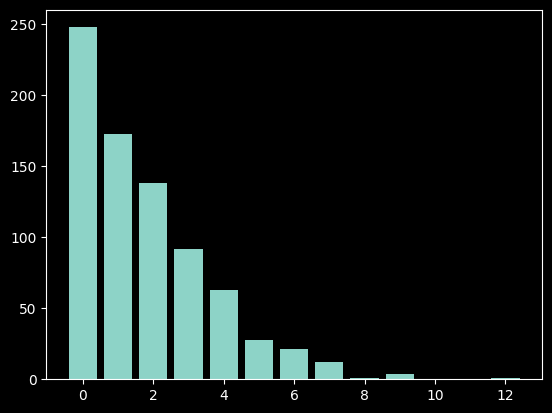

In [ ]:
# ▶ Information page plotting
plt.bar(df_info.index, df_info['Informational']);

In [ ]:
# ▶ Productrelated (product page)
df_prod = pd.DataFrame(df_cus[df_cus['BounceRates']>0.009804].groupby('ProductRelated')['ProductRelated'].count().sort_values(ascending=False))
df_prod.head(5)

,ProductRelated
ProductRelated,
36,18
23,15
8,15
27,15
11,14


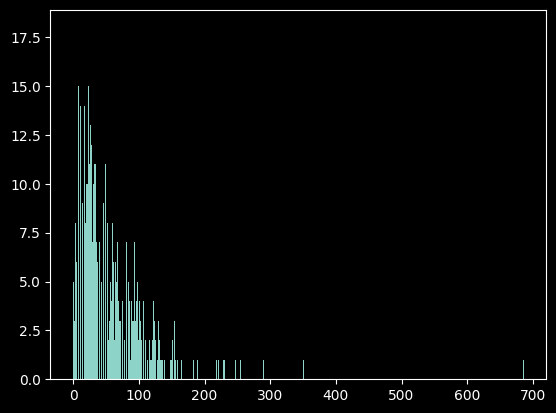

In [ ]:
# ▶ Productrelated (product page) Plotting
plt.bar(df_prod.index, df_prod['ProductRelated']);

### · The highest user journey
---


In [ ]:
# ▶ User journey with the highest termination rate
df_cus.sort_values(by=['ExitRates'], ascending=False)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
133,0,1,0,0.200000,0.200000,0.000000
479,1,1,0,0.200000,0.200000,0.000000
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
135,0,1,2,0.100000,0.133333,0.000000
...,...,...,...,...,...,...
1166,3,2,58,0.000000,0.000410,0.000000
772,2,0,109,0.000000,0.000262,0.000000
673,1,6,21,0.000000,0.000000,0.000000
1241,3,6,17,0.000000,0.000000,27.695008


In [ ]:
df_cus['ExitRates'].mean()

np.float64(0.02191452121274479)

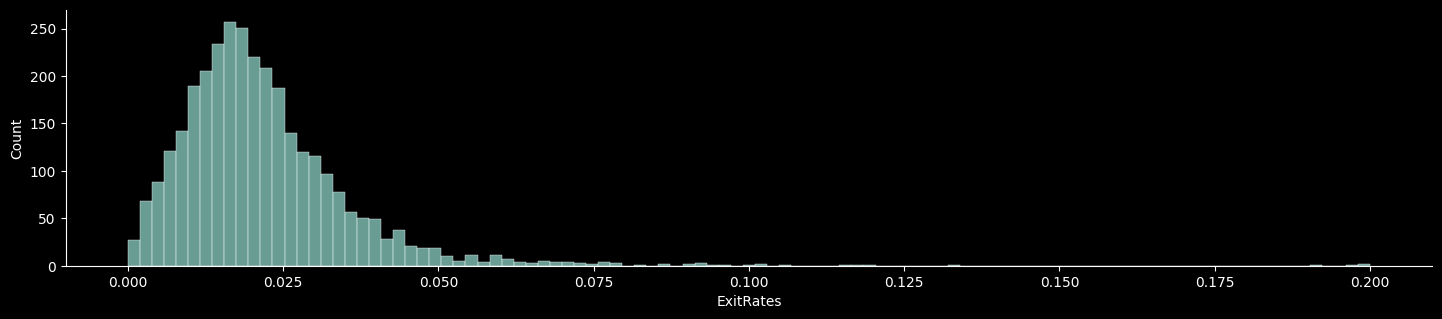

In [ ]:
sns.displot(df_cus, x="ExitRates");
plt.gcf().set_size_inches(16.5, 3)

In [ ]:
df_cus['ExitRates'].describe()

,ExitRates
count,3131.000000
mean,0.021915
std,0.014863
min,0.000000
25%,0.013098
50%,0.019235
75%,0.027327
max,0.200000


In [ ]:
# ▶ User journey with a high end rate based on the 75% quartile
df_cus[df_cus['ExitRates']>0.027327].head(5)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
2,0,0,2,0.059117,0.119900,0.219656
3,0,0,3,0.043066,0.092056,0.843937
4,0,0,4,0.035120,0.076977,0.747517


In [ ]:
len(df_cus[df_cus['ExitRates']>0.027327])

783

In [ ]:
# ▶ Administrative (management page)
df_admin = pd.DataFrame(df_cus[df_cus['ExitRates']>0.027327].groupby('Administrative')['Administrative'].count().sort_values(ascending=False))
df_admin.head(5)

,Administrative
Administrative,
0,165
1,92
2,88
3,80
5,58


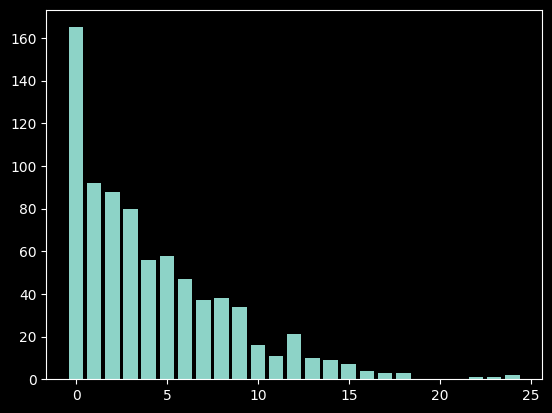

In [ ]:
# ▶ Administrative (Administrative Page) Plotting
plt.bar(df_admin.index, df_admin['Administrative']);

In [ ]:
# ▶ Information page
df_info = pd.DataFrame(df_cus[df_cus['ExitRates']>0.027327].groupby('Informational')['Informational'].count().sort_values(ascending=False))
df_info

,Informational
Informational,
0,243
1,181
2,150
3,89
4,52
5,28
6,18
7,11
9,3


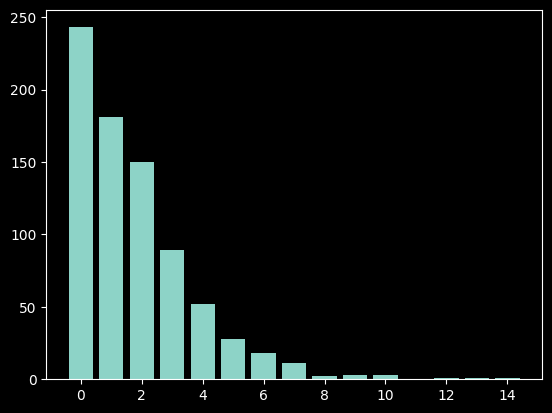

In [ ]:
# ▶ Information page plotting
plt.bar(df_info.index, df_info['Informational']);

In [ ]:
# ▶ Productrelated (product page)
df_prod = pd.DataFrame(df_cus[df_cus['ExitRates']>0.027327].groupby('ProductRelated')['ProductRelated'].count().sort_values(ascending=False))
df_prod.head(5)

,ProductRelated
ProductRelated,
8,18
27,16
17,16
11,16
2,15


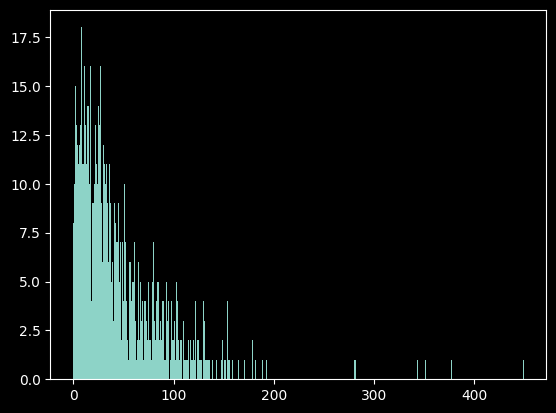

In [ ]:
# ▶ Productrelated (product page) Plotting
plt.bar(df_prod.index, df_prod['ProductRelated']);

## ** 🥇Session 3 **
** ┗ Insight derivation **
---


### · A single page with urgent improvement


#### · Administrative
* Improves the most pages with the largest CNT with the departure rate and the end rate of 75%.


In [ ]:
# ▶ Departure rate 75% more than CNT, TOP5
df_admin_B = df_cus[df_cus['BounceRates']>0.009804].groupby('Administrative', as_index=False)['Administrative'].count()
df_admin_B = df_admin_B.reset_index()
df_admin_B.columns = ['ID', 'BounceRates_cnt']
df_admin_B.head(5)

,ID,BounceRates_cnt
0,0,140
1,1,86
2,2,81
3,3,68
4,4,54


In [ ]:
# ▶ End rate 75% more than CNT, TOP5
df_admin_E = df_cus[df_cus['ExitRates']>0.027327].groupby('Administrative', as_index=False)['Administrative'].count()
df_admin_E = df_admin_E.reset_index()
df_admin_E.columns = ['ID', 'ExitRates_cnt']
df_admin_E.head(5)

,ID,ExitRates_cnt
0,0,165
1,1,92
2,2,88
3,3,80
4,4,56


In [ ]:
# ▶ Merge sorted
df_admin_merge = pd.merge(df_admin_B, df_admin_E, how='left', on='ID')
df_admin_merge['total'] = df_admin_merge['BounceRates_cnt'] +  df_admin_merge['ExitRates_cnt']
df_admin_merge.sort_values(by=['total'], ascending=False).head(5)

,ID,BounceRates_cnt,ExitRates_cnt,total
0,0,140,165.0,305.0
1,1,86,92.0,178.0
2,2,81,88.0,169.0
3,3,68,80.0,148.0
5,5,63,58.0,121.0


#### · Information


In [ ]:
# ▶ Departure rate 75% more than CNT, TOP5
df_info_B = df_cus[df_cus['BounceRates']>0.009804].groupby('Informational', as_index=False)['Informational'].count()
df_info_B = df_info_B.reset_index()
df_info_B.columns = ['ID', 'BounceRates_cnt']

# ▶ End rate 75% more than CNT, TOP5
df_info_E = df_cus[df_cus['ExitRates']>0.027327].groupby('Informational', as_index=False)['Informational'].count()
df_info_E = df_info_E.reset_index()
df_info_E.columns = ['ID', 'ExitRates_cnt']

# ▶ Merge sorted
df_info_merge = pd.merge(df_info_B, df_info_E, how='left', on='ID')
df_info_merge['total'] = df_info_merge['BounceRates_cnt'] +  df_info_merge['ExitRates_cnt']
df_info_merge.sort_values(by=['total'], ascending=False).head(5)

,ID,BounceRates_cnt,ExitRates_cnt,total
0,0,248,243,491
1,1,173,181,354
2,2,138,150,288
3,3,92,89,181
4,4,63,52,115


#### · Productrelated



In [ ]:
# ▶ Departure rate 75% more than CNT, TOP5
df_prod_B = df_cus[df_cus['BounceRates']>0.009804].groupby('ProductRelated', as_index=False)['ProductRelated'].count()
df_prod_B = df_prod_B.reset_index()
df_prod_B.columns = ['ID', 'BounceRates_cnt']

# ▶ End rate 75% more than CNT, TOP5
df_prod_E = df_cus[df_cus['ExitRates']>0.027327].groupby('ProductRelated', as_index=False)['ProductRelated'].count()
df_prod_E = df_prod_E.reset_index()
df_prod_E.columns = ['ID', 'ExitRates_cnt']

# ▶ Merge sorted
df_prod_merge = pd.merge(df_prod_B, df_prod_E, how='left', on='ID')
df_prod_merge['total'] = df_prod_merge['BounceRates_cnt'] +  df_prod_merge['ExitRates_cnt']
df_prod_merge.sort_values(by=['total'], ascending=False).head(5)

,ID,BounceRates_cnt,ExitRates_cnt,total
8,8,15,18.0,33.0
27,27,15,16.0,31.0
17,17,14,16.0,30.0
11,11,14,16.0,30.0
36,36,18,11.0,29.0


### · Improvement of user journey
* User journey is a management page -information page -Unique path that reaches the product page
* The user journey, which is the most common (click) user journey that customers experience the most, should be improved as a priority.


In [ ]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# ▶ Counts for each user journey (*how much the customer used the route), Mean (*average of departure rate and termination rate in that path)
df_jny = df.groupby(['Administrative', 'Informational', 'ProductRelated'], as_index=False)[['BounceRates', 'ExitRates']].agg(['count', 'mean']).reset_index()
df_jny

index Administrative Informational ProductRelated BounceRates            \
                                                             count      mean   
0        0              0             0              0           6  0.196667   
1        1              0             0              1         577  0.183362   
2        2              0             0              2         375  0.059117   
3        3              0             0              3         332  0.043066   
4        4              0             0              4         285  0.035120   
...    ...            ...           ...            ...         ...       ...   
3126  3126             24             5             34           1  0.000000   
3127  3127             24             6            178           1  0.003939   
3128  3128             24             6            189           1  0.018642   
3129  3129             26             9            183           1  0.011055   
3130  3130             27             2            584           1  0.002099   

     ExitRates            
         count      mean  
0            6  0.196970  
1          577  0.191400  
2          375  0.119900  
3          332  0.092056  
4          285  0.076977  
...        ...       ...  
3126         1  0.013801  
3127         1  0.015263  
3128         1  0.043831  
3129         1  0.014200  
3130         1  0.009347  

[3131 rows x 8 columns]

In [ ]:
df_jny.columns

MultiIndex([(         'index',      ''),
            ('Administrative',      ''),
            ( 'Informational',      ''),
            ('ProductRelated',      ''),
            (   'BounceRates', 'count'),
            (   'BounceRates',  'mean'),
            (     'ExitRates', 'count'),
            (     'ExitRates',  'mean')],
           )

In [ ]:
# ▶ 0, 0, and 1 paths are the most commonly experienced route of users, and the departure rate and exit rate are also high → Parts that require improvement
df_jny.sort_values(by=[('BounceRates', 'count'), ('BounceRates', 'mean')], ascending=False).head(5)

index Administrative Informational ProductRelated BounceRates            \
                                                          count      mean   
1     1              0             0              1         577  0.183362   
2     2              0             0              2         375  0.059117   
3     3              0             0              3         332  0.043066   
4     4              0             0              4         285  0.035120   
5     5              0             0              5         263  0.034415   

  ExitRates            
      count      mean  
1       577  0.191400  
2       375  0.119900  
3       332  0.092056  
4       285  0.076977  
5       263  0.070242

In [ ]:
# ▶ 0, 0, and 1 paths are the most commonly experienced route of users, and the departure rate and exit rate are also high → Parts that require improvement
df_jny.sort_values(by=[('ExitRates', 'count'), ('ExitRates', 'mean')], ascending=False).head(5)

index Administrative Informational ProductRelated BounceRates            \
                                                          count      mean   
1     1              0             0              1         577  0.183362   
2     2              0             0              2         375  0.059117   
3     3              0             0              3         332  0.043066   
4     4              0             0              4         285  0.035120   
5     5              0             0              5         263  0.034415   

  ExitRates            
      count      mean  
1       577  0.191400  
2       375  0.119900  
3       332  0.092056  
4       285  0.076977  
5       263  0.070242

In [ ]:
# ▶ (1) A single page that requires improvement

# Management: ID (0, 1, 2, 3, 4)
# Information: ID (0, 1, 2, 3, 5)
# Product: ID (8, 27, 17, 11, 36)

# ▶ (2) User journey combination that requires improvement

# (0,0,1)
# (0,0,2)
# (0,0,3)
# (0,0,4)
# (0,0,5)